<a href="https://colab.research.google.com/github/greg881203/Pytorch/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch


In [2]:
from sklearn.datasets import make_circles


# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
            noise=0.03, # a little bit of noise to the dots
            random_state=42) # keep random state so we get the same values

In [3]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [4]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({ "X1": X[:, 0],
              "X2": X[:, 1],
              "label": y })
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


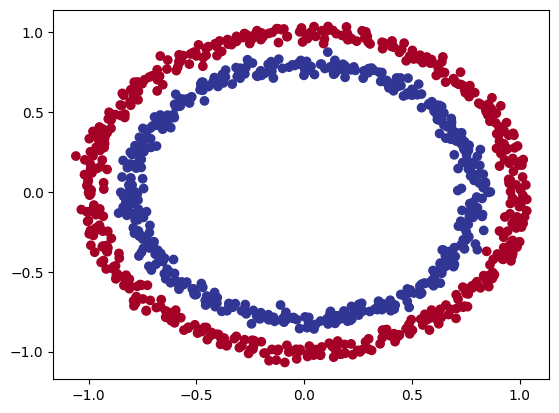

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
      y=X[:, 1], 
      c=y, 
      cmap=plt.cm.RdYlBu);

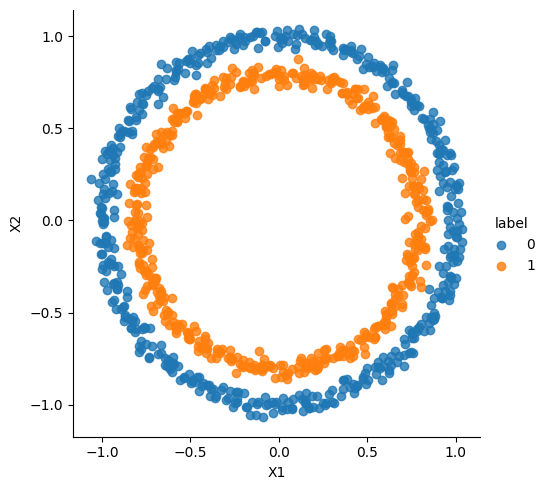

In [6]:
import seaborn as sns
sns.lmplot(x = 'X1', y = "X2", hue = 'label', fit_reg=False, data = circles)
plt.show()

In [7]:
# len(circles)
# X.shape , y.shape

In [8]:
# train_split = int(0.8 * len(circles))
# x_train , y_train = X[:train_split] , y[:train_split]
# x_test , y_test = X[train_split:] , y[train_split:]
# len(x_train),len(y_train),len(x_test),len(x_test)
# x_train.shape , y_train.shape , x_test.shape , y_test.shape

### Check input and output shapes

In [9]:
X.shape , y.shape

((1000, 2), (1000,))

In [10]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [11]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### Turn data into tensors and create train and test splits

In [12]:
import torch
torch.__version__

'2.0.1+cu118'

In [13]:
type(X) ,X.dtype

(numpy.ndarray, dtype('float64'))

In [14]:
# Turn the data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [15]:
type(X) ,type(y) ,X.dtype ,y.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

In [16]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split( X , 
                                 y ,
                                 test_size = 0.2,
                                 random_state=42)

In [17]:
len(X_train) ,len(X_test), len(y_train)  ,len(y_test) 

(800, 200, 800, 200)

## Building a model
* Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
* Constructing a model by subclassing nn.Module.
* Defining a loss function and optimizer.
* Creating a training loop (this'll be in the next section).

In [18]:
# Check for GPU
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [19]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

1.Subclasses nn.Module (almost all PyTorch models are subclasses of nn.Module).

2.Creates 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.

3.Defines a forward() method containing the forward pass computation of the model.

4.Instantiates the model class and sends it to the target device.

In [20]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)
    
    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
device

'cuda'

In [22]:
model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5 , out_features = 1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0684,  0.4999],
                      [-0.3565,  0.6293],
                      [ 0.0824, -0.6760],
                      [ 0.6239,  0.6017],
                      [-0.2412,  0.4749]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.1112,  0.3088,  0.0778, -0.0545,  0.4977], device='cuda:0')),
             ('1.weight',
              tensor([[0.3005, 0.2098, 0.1935, 0.3044, 0.1113]], device='cuda:0')),
             ('1.bias', tensor([-0.2909], device='cuda:0'))])

In [24]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[ 0.0942],
        [ 0.2344],
        [-0.3196],
        [ 0.2117],
        [-0.3934],
        [-0.3073],
        [ 0.1458],
        [ 0.0188],
        [-0.3159],
        [ 0.2430]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### Set loss funciotn and optimizer

In [25]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.1)

In [26]:
# Caculate accuracy
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_pred,y_true).sum().item()
  acc = (correct / len(y_pred))*100
  return acc

## Train model

### 3.1 Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)

In [27]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits #最原始

tensor([[ 0.0942],
        [ 0.2344],
        [-0.3196],
        [ 0.2117],
        [-0.3934]], device='cuda:0', grad_fn=<SliceBackward0>)

In [28]:
len(y_logits)

5

In [29]:
# import numpy as np
# def sigmoid(z):
#     return 1.0 / (1 + np.exp(-z))

In [30]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs #經過sigmoid

tensor([[0.5235],
        [0.5583],
        [0.4208],
        [0.5527],
        [0.4029]], device='cuda:0', grad_fn=<SigmoidBackward0>)

* If y_pred_probs >= 0.5, y=1 (class 1)
* If y_pred_probs < 0.5, y=0 (class 0)
* To turn our prediction probabilities in prediction labels, we can round the outputs of the sigmoid activation function.

In [31]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)
y_preds,y_preds.squeeze(),y_train[:5]

(tensor([[1.],
         [1.],
         [0.],
         [1.],
         [0.]], device='cuda:0', grad_fn=<RoundBackward0>),
 tensor([1., 1., 0., 1., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>),
 tensor([1., 0., 0., 0., 1.]))

In [32]:
# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 0., 1., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [33]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [34]:
model_0.to(device)
next(model_0.parameters()).device

device(type='cuda', index=0)

### 3.2 Building a training and testing loop

In [35]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits,y_train) # Using nn.BCEWithLogitsLoss works with raw logits
                    
    acc = accuracy_fn(y_true = y_train, y_pred = y_pred)  
                      

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                   y_test)
        test_acc = accuracy_fn( y_true=y_test,
                      y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70144, Accuracy: 48.50% | Test loss: 0.71154, Test acc: 45.50%
Epoch: 10 | Loss: 0.69860, Accuracy: 49.62% | Test loss: 0.70772, Test acc: 45.00%
Epoch: 20 | Loss: 0.69680, Accuracy: 50.38% | Test loss: 0.70496, Test acc: 45.00%
Epoch: 30 | Loss: 0.69561, Accuracy: 50.62% | Test loss: 0.70290, Test acc: 45.50%
Epoch: 40 | Loss: 0.69482, Accuracy: 50.38% | Test loss: 0.70132, Test acc: 45.50%
Epoch: 50 | Loss: 0.69427, Accuracy: 50.62% | Test loss: 0.70008, Test acc: 44.50%
Epoch: 60 | Loss: 0.69389, Accuracy: 50.88% | Test loss: 0.69910, Test acc: 45.00%
Epoch: 70 | Loss: 0.69362, Accuracy: 50.88% | Test loss: 0.69832, Test acc: 45.50%
Epoch: 80 | Loss: 0.69344, Accuracy: 51.25% | Test loss: 0.69770, Test acc: 45.50%
Epoch: 90 | Loss: 0.69330, Accuracy: 51.25% | Test loss: 0.69719, Test acc: 45.00%


## 5. Improving a model (from a model perspective)
* Add more layers
* Add more hidden units
* Fitting for longer (more epochs)
* Changing the activation functions
* Change the learning rate
* Change the loss function

In [53]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2 ,out_features = 64)
    self.layer_2 = nn.Linear(in_features = 64 , out_features = 64)# extra layer
    self.layer_3 = nn.Linear(in_features =64 , out_features = 1)
  
  def forward(self,x):# note: always make sure forward is spelt correctly!
      # Creating a model like this is the same as below, though below
      # generally benefits from speedups where possible.
      # z = self.layer_1(x)
      # z = self.layer_2(z)
      # z = self.layer_3(z)
      # return z
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=1, bias=True)
)

In [48]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.3041, -0.0775],
                      [-0.5293,  0.6441],
                      [-0.5190,  0.3779],
                      [ 0.2485,  0.2298],
                      [-0.3823,  0.6427],
                      [ 0.1554,  0.0910],
                      [-0.6231,  0.2968],
                      [-0.1061, -0.3239],
                      [ 0.6074,  0.1576],
                      [-0.3912, -0.3579],
                      [-0.0338,  0.3948],
                      [-0.1807, -0.4035],
                      [-0.2421, -0.5283],
                      [ 0.2522,  0.5473],
                      [-0.6657,  0.1642],
                      [ 0.3653,  0.1282],
                      [-0.2518,  0.3691],
                      [ 0.3716,  0.2644],
                      [-0.1243, -0.1872],
                      [ 0.0756, -0.1249],
                      [-0.2107,  0.4520],
                      [ 0.6077, -0.0700],
                      [-0.1583,  0.0103],
  

In [49]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_1.parameters() , lr =0.1)

In [54]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train()
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train , y_pred=y_pred)
 
                     
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,y_test)
                            
        test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)
                               

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69852, Accuracy: 50.88% | Test loss: 0.70969, Test acc: 45.50%
Epoch: 100 | Loss: 0.69852, Accuracy: 50.88% | Test loss: 0.70969, Test acc: 45.50%
Epoch: 200 | Loss: 0.69852, Accuracy: 50.88% | Test loss: 0.70969, Test acc: 45.50%
Epoch: 300 | Loss: 0.69852, Accuracy: 50.88% | Test loss: 0.70969, Test acc: 45.50%
Epoch: 400 | Loss: 0.69852, Accuracy: 50.88% | Test loss: 0.70969, Test acc: 45.50%
Epoch: 500 | Loss: 0.69852, Accuracy: 50.88% | Test loss: 0.70969, Test acc: 45.50%
Epoch: 600 | Loss: 0.69852, Accuracy: 50.88% | Test loss: 0.70969, Test acc: 45.50%
Epoch: 700 | Loss: 0.69852, Accuracy: 50.88% | Test loss: 0.70969, Test acc: 45.50%
Epoch: 800 | Loss: 0.69852, Accuracy: 50.88% | Test loss: 0.70969, Test acc: 45.50%
Epoch: 900 | Loss: 0.69852, Accuracy: 50.88% | Test loss: 0.70969, Test acc: 45.50%
